In [50]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

## Functions

In [51]:
# Вывод графиков АЧХ и ФЧХ
def printfilter(title, w, h, **kwargs):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,5), layout='constrained')
    fig.suptitle(title)

    with np.errstate(divide='ignore'): # suppress RuntimeWarning: divide by zero encountered in log10
        ax[0].plot(w, 20 * np.log10(abs(h)), 'b')
    ax[0].set_ylabel('Амплитуда, дБ', color='b')
    ax[0].set_xlabel('Частота, Гц')
    ax[0].grid(True)


    angles = np.unwrap(np.angle(h))
    ax[1].plot(w, angles, 'g')
    ax[1].set_ylabel('Фаза, Гр', color='g')
    ax[1].set_xlabel('Частота, Гц')
    ax[1].grid(True)

    if 'ylimits' in kwargs.keys():
        ax[0].set_ylim(kwargs['ylimits'])

    if 'xvlines' in kwargs.keys():
        for xvline in kwargs['xvlines']:
            for axis in ax:
                axis.axvline(x=xvline, color='gray', linestyle='dashed', linewidth=1.5)

    plt.show()


## 1. Синтез цифровых фильтров

In [52]:
# Исходные данные

# Нормированная частота среза (Гц)
Fc = 5250/25000

# Нормированная частота задержания (Гц)
Fz = 5650/25000

# Уровень на частоте среза
Qc = 3

# Уровень на частоте задержания
Qz = 40

# Частота дискретизации (Гц)
Fd = 50000

# Пульсации в полосе пропускания (Дб)
Rp = 0.5

# Пульсации в полосе подавления (Дб)
Rs = 150

# Полоса (для полосового и режекторного фильтров)
dF = [5000/25000, 10000/25000]

### 1.1 Аппроксимация Баттерворта

##### Используемые функции

**Расчет порядка цифрового фильтра Баттерворта**

`buttord(wp, ws, gpass, gstop, analog, fs)`

Возвращает минимальный порядок цифрового фильтра и натуральную частоту Баттерворта

`wp` - частота среза (для фильтров низких или высоких частот) или частоты полосы пропускания (для полосовых фильтров)\
`ws` - частота задержания (для фильтров низких или высоких частот) или частоты полосы подавления (для полосовых фильтров)\
`gpass` - максимально-допустимые потери в полосе пропускания\
`gstop` - минимальное затухание в полосе подавления\
`analog` - ***false*** (по умолчанию) - для цифровых фильтров, ***true*** - для аналоговых фильтров\
`fs` - частота дискретизации цифровой системы


**Синтез цифрового или аналогового фильтра заданного порядка**

Возвращает коэффициенты синтезированного фильтра

`butter(N, Wn, btype, analog, output, fs)`

`N` - порядок фильтра\
`Wn` - критические частоты фильтра\
`btype` - тип фильтра: ***lowpass*** - фильтр низких частот, ***highpass*** - фильтр высоких частот, ***bandpass*** - полосовой фильтр, ***bandstop*** - режекторный фильтр\
`analog` - ***false*** (по умолчанию) - для цифровых фильтров, ***true*** - для аналоговых фильтров\
`output` - тип возвращаемых значений: ***ba*** (по умолчанию), ***zpk***, ***sos***\
`fs` - частота дискретизации цифровой системы

**Вычисление АЧХ и ФЧХ синтезированного цифрового фильтра**

`freqz(b, a, worN, whole, plot, fs, include_nyquist)`

`b` - коэффициенты прямых связей\
`a` - коэффициенты обратных связей\
`worN` - количество вычисляемых точек (по умолчанию - 512)\
`whole` - ***false*** (по умолчанию) - вычисление частот от 0 до частоты Найквиста, ***true*** - вычисление частот от 0 до частоты дискретизации (fs)\
`plot` - функция для отрисовки результата\
`fs` - частота дискретизации цифровой системы\
`include_nyquist` - вычисление результата для наибольшей частоты (частоты Найквиста) (по умолчанию - не вычисляется)


In [53]:
# Расчитаем порядок ЦФ Баттерворта. Для этого воспользуемся функцией buttord:
[n, Fn] = sig.buttord(wp=Fc, ws=Fz, gpass=Qc, gstop=Qz, fs=Fd)
print(f'n = {n}\nWn = {Fn}')

n = 63
Wn = 0.21000791505488095


#### Фильтр низких частот

n = 7
Wn = 0.2000678535567116


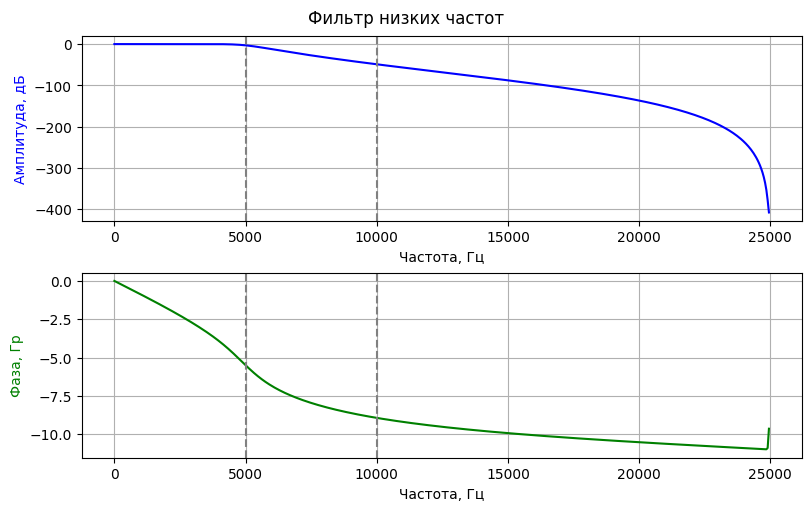

In [54]:
# Нормированная частота среза (Гц)
Fc = 5000/25000

# Нормированная частота задержания (Гц)
Fz = 10000/25000

# Уровень на частоте среза
Qc = 3

# Уровень на частоте задержания
Qz = 40

# Частота дискретизации (Гц)
Fd = 50000

# Расчитаем порядок ЦФ Баттерворта. Для этого воспользуемся функцией buttord:
[n, Fn] = sig.buttord(wp=Fc, ws=Fz, gpass=Qc, gstop=Qz, fs=Fd)
print(f'n = {n}\nWn = {Fn}')

# Синтезируем ЦФ. Для этого воспользуемся функцией butter:
[b, a] = sig.butter(n, Fn, btype="lowpass")

# Для вывода АЧХ и ФЧХ воспользуемся функцией freqz:
w, h = sig.freqz(b, a, worN=512, fs=Fd)

printfilter(title='Фильтр низких частот', w=w, h=h, xvlines=[5000, 10000])


#### Фильтр высоких частот

n = 7
Wn = 0.39986433891205625


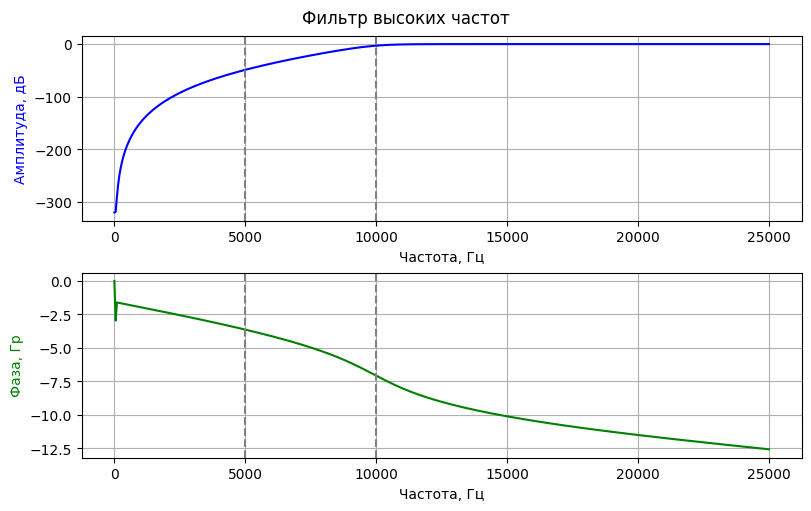

In [55]:
# Нормированная частота среза (Гц)
Fc = 10000/25000

# Нормированная частота задержания (Гц)
Fz = 5000/25000

# Уровень на частоте среза
Qc = 3

# Уровень на частоте задержания
Qz = 40

# Частота дискретизации (Гц)
Fd = 50000

# Расчитаем порядок ЦФ Баттерворта. Для этого воспользуемся функцией buttord:
[n, Fn] = sig.buttord(wp=Fc, ws=Fz, gpass=Qc, gstop=Qz, fs=Fd)
print(f'n = {n}\nWn = {Fn}')

# Синтезируем ЦФ. Для этого воспользуемся функцией butter:
b, a = sig.butter(n, Fn, btype="highpass")
# Для вывода АЧХ и ФЧХ воспользуемся функцией freqz:
w, h = sig.freqz(b, a, worN=512, fs=Fd, include_nyquist=True)

printfilter(title='Фильтр высоких частот', w=w, h=h, xvlines=[5000, 10000])

#### Полосовой фильтр

n = 6
Wn = [0.19997361 0.40005278]


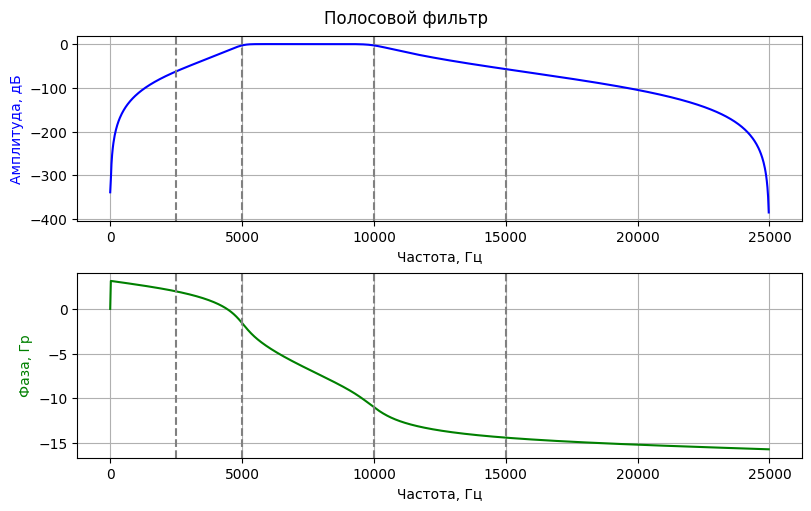

In [56]:
# Уровень на частоте среза
Qc = 3

# Уровень на частоте задержания
Qz = 40

# Частота дискретизации (Гц)
Fd = 50000

# Полоса пропускания
dF = [5000/25000, 10000/25000]

# Полоса задержания
dFz = [2500/25000, 15000/25000]

# Расчитаем порядок ЦФ Баттерворта. Для этого воспользуемся функцией buttord:
[n, Fn] = sig.buttord(wp=dF, ws=dFz, gpass=Qc, gstop=Qz, fs=Fd)
print(f'n = {n}\nWn = {Fn}')

# Синтезируем ЦФ. Для этого воспользуемся функцией butter:
b, a = sig.butter(n, Fn, btype="bandpass")
# Для вывода АЧХ и ФЧХ воспользуемся функцией freqz:
w, h = sig.freqz(b, a, worN=1024, fs=Fd)

printfilter(title='Полосовой фильтр', w=w, h=h, xvlines=[2500, 5000, 10000, 15000])

#### Режекторный фильтр

n = 8
Wn = [0.13822063 0.52935279]


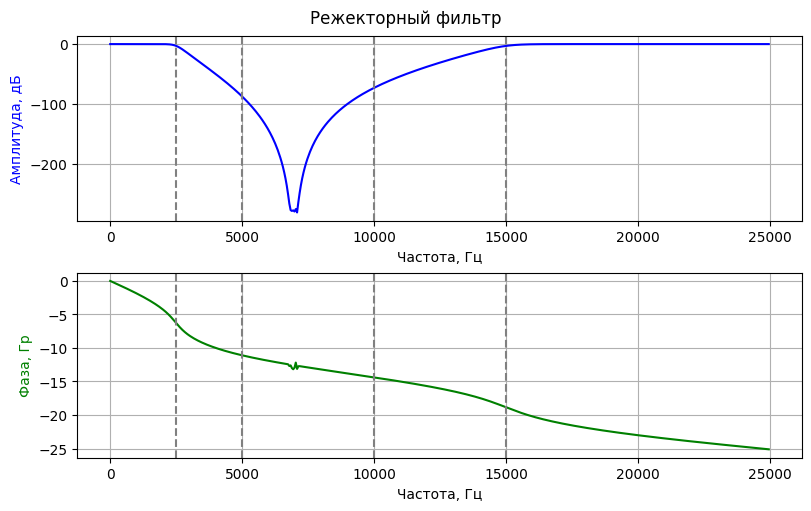

In [57]:
# Уровень на частоте среза
Qc = 3

# Уровень на частоте задержания
Qz = 40

# Частота дискретизации (Гц)
Fd = 50000

# Полоса пропускания
dF = [2500/25000, 15000/25000]

# Полоса задержания
dFz = [5000/25000, 10000/25000]

# Расчитаем порядок ЦФ Баттерворта. Для этого воспользуемся функцией buttord:
[n, Fn] = sig.buttord(wp=dF, ws=dFz, gpass=Qc, gstop=Qz, fs=Fd)
print(f'n = {n}\nWn = {Fn}')

b, a = sig.butter(n, dF, btype="bandstop")
w, h = sig.freqz(b, a, worN=512, fs=Fd)

printfilter(title='Режекторный фильтр', w=w, h=h, xvlines=[2500, 5000, 10000, 15000])

### 1.2 Аппроксимация Чебышева

##### Используемые функции

**Расчет порядка цифрового фильтра Чебышева 1 типа**

`cheb1ord(wp, ws, gpass, gstop, analog, fs)`

Возвращает минимальный порядок аналогового или цифрового фильтра и натуральную частоту Чебышева

`wp` - частота среза (для фильтров низких или высоких частот) или частоты полосы пропускания (для полосовых фильтров)\
`ws` - частота задержания (для фильтров низких или высоких частот) или частоты полосы подавления (для полосовых фильтров)\
`gpass` - максимально-допустимые потери в полосе пропускания\
`gstop` - минимальное затухание в полосе подавления\
`analog` - ***false*** (по умолчанию) - для цифровых фильтров, ***true*** - для аналоговых фильтров\
`fs` - частота дискретизации цифровой системы


**Синтез цифрового или аналогового фильтра заданного порядка**

Возвращает коэффициенты синтезированного фильтра

`cheby1(N, rp, Wn, btype, analog, output, fs)`

`N` - порядок фильтра\
`rp` - максимальная пульсация в полосе пропускания\
`Wn` - критические частоты фильтра\
`btype` - тип фильтра: ***lowpass*** - фильтр низких частот, ***highpass*** - фильтр высоких частот, ***bandpass*** - полосовой фильтр, ***bandstop*** - режекторный фильтр\
`analog` - ***false*** (по умолчанию) - для цифровых фильтров, ***true*** - для аналоговых фильтров\
`output` - тип возвращаемых значений: ***ba*** (по умолчанию), ***zpk***, ***sos***\
`fs` - частота дискретизации цифровой системы

**Вычисление АЧХ и ФЧХ синтезированного цифрового фильтра**

`freqz(b, a, worN, whole, plot, fs, include_nyquist)`

`b` - коэффициенты прямых связей\
`a` - коэффициенты обратных связей\
`worN` - количество вычисляемых точек (по умолчанию - 512)\
`whole` - ***false*** (по умолчанию) - вычисление частот от 0 до частоты Найквиста, ***true*** - вычисление частот от 0 до частоты дискретизации (fs)\
`plot` - функция для отрисовки результата\
`fs` - частота дискретизации цифровой системы\
`include_nyquist` - вычисление результата для наибольшей частоты (частоты Найквиста) (по умолчанию - не вычисляется)


#### Фильтр низких частот

n = 5
Wn = 0.19999999999999998


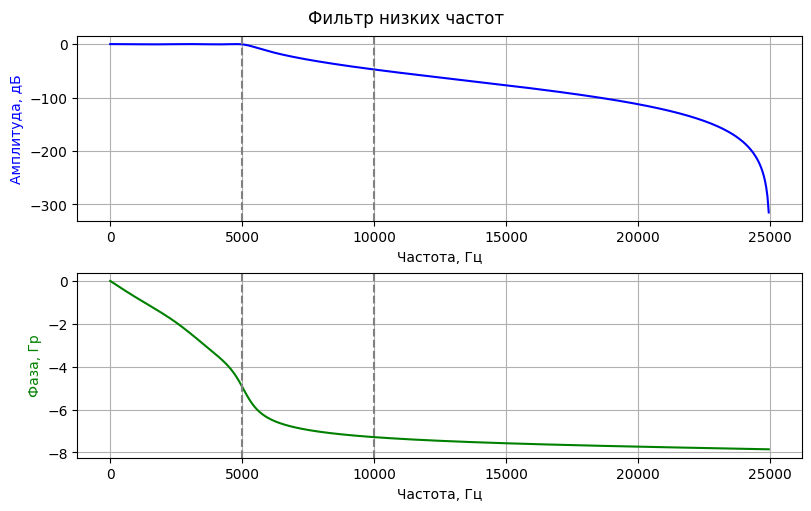

In [58]:
# Нормированная частота среза (Гц)
Fc = 5000/25000

# Нормированная частота задержания (Гц)
Fz = 10000/25000

# Уровень на частоте среза
Qc = 3

# Уровень на частоте задержания
Qz = 40

# Частота дискретизации (Гц)
Fd = 50000

# Пульсации в полосе пропускания (Дб)
Rp = 0.5

# Расчитаем порядок цифрового фильтр Чебышева. Для этого воспользуемся функцией cheb1ord (аналогична функции buttord):
[n, Fn] = sig.cheb1ord(wp=Fc, ws=Fz, gpass=Qc, gstop=Qz, analog=False, fs=Fd)
print(f'n = {n}\nWn = {Fn}')

# Синтезируем ЦФ. Для этого воспользуемся функцией cheby1:
[b, a] = sig.cheby1(N=n, rp=Rp, Wn=Fn, analog=False, output='ba', btype="lowpass")

# Для вывода АЧХ и ФЧХ воспользуемся функцией freqz:
w, h = sig.freqz(b, a, worN=512, fs=Fd)

printfilter(title='Фильтр низких частот', w=w, h=h, xvlines=[5000, 10000])

#### Фильтр высоких частот

n = 5
Wn = 0.39999999999999997


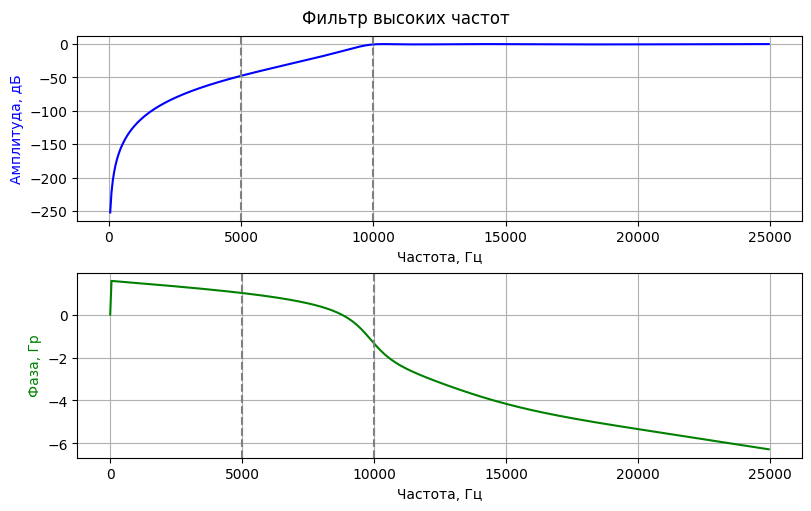

In [59]:
# Нормированная частота среза (Гц)
Fc = 10000/25000

# Нормированная частота задержания (Гц)
Fz = 5000/25000

# Уровень на частоте среза
Qc = 3

# Уровень на частоте задержания
Qz = 40

# Частота дискретизации (Гц)
Fd = 50000

# Пульсации в полосе пропускания (Дб)
Rp = 0.5

# Расчитаем порядок цифрового фильтр Чебышева. Для этого воспользуемся функцией cheb1ord (аналогична функции buttord):
[n, Fn] = sig.cheb1ord(wp=Fc, ws=Fz, gpass=Qc, gstop=Qz, analog=False, fs=Fd)
print(f'n = {n}\nWn = {Fn}')

# Синтезируем ЦФ. Для этого воспользуемся функцией cheby1:
[b, a] = sig.cheby1(N=n, rp=Rp, Wn=Fn, analog=False, output='ba', btype="highpass")

# Для вывода АЧХ и ФЧХ воспользуемся функцией freqz:
w, h = sig.freqz(b, a, worN=512, fs=Fd)

printfilter(title='Фильтр высоких частот', w=w, h=h, xvlines=[5000, 10000])

#### Полосовой фильтр

n = 4
Wn = [0.2 0.4]


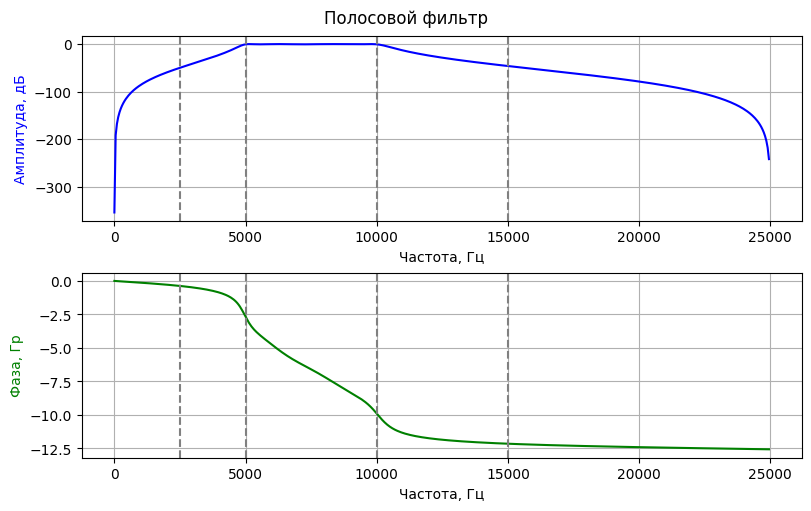

In [60]:
# Уровень на частоте среза
Qc = 3

# Уровень на частоте задержания
Qz = 40

# Частота дискретизации (Гц)
Fd = 50000

# Полоса пропускания
dF = [5000/25000, 10000/25000]

# Полоса задержания
dFz = [2500/25000, 15000/25000]

# Пульсации в полосе пропускания (Дб)
Rp = 0.5

# Расчитаем порядок цифрового фильтр Чебышева. Для этого воспользуемся функцией cheb1ord (аналогична функции buttord):
[n, Fn] = sig.cheb1ord(wp=dF, ws=dFz, gpass=Qc, gstop=Qz, analog=False, fs=Fd)
print(f'n = {n}\nWn = {Fn}')

# Синтезируем ЦФ. Для этого воспользуемся функцией cheby1:
[b, a] = sig.cheby1(N=n, rp=Rp, Wn=Fn, analog=False, output='ba', btype="bandpass")

# Для вывода АЧХ и ФЧХ воспользуемся функцией freqz:
w, h = sig.freqz(b, a, worN=512, fs=Fd)

printfilter(title='Полосовой фильтр', w=w, h=h, xvlines=[2500, 5000, 10000, 15000])

#### Режекторный фильтр

n = 5
Wn = [0.1381966  0.52944487]


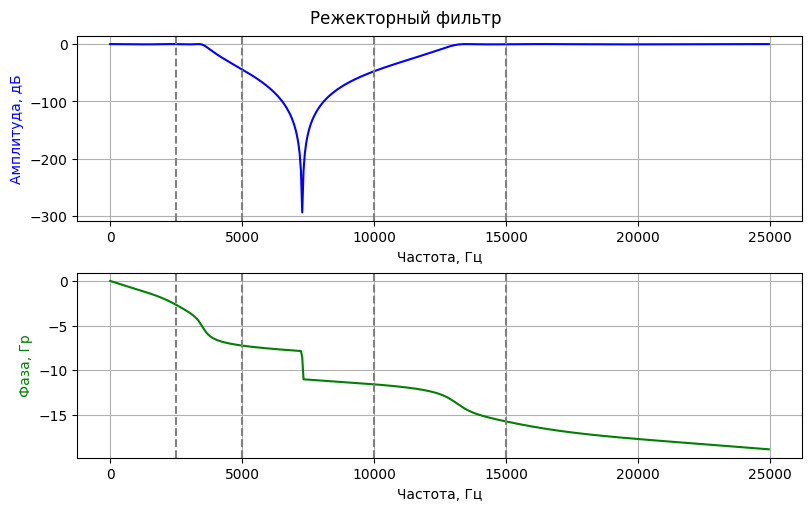

In [61]:
# Уровень на частоте среза
Qc = 3

# Уровень на частоте задержания
Qz = 40

# Частота дискретизации (Гц)
Fd = 50000

# Полоса пропускания
dF = [2500/25000, 15000/25000]

# Полоса задержания
dFz = [5000/25000, 10000/25000]

# Пульсации в полосе пропускания (Дб)
Rp = 0.5

# Расчитаем порядок цифрового фильтр Чебышева. Для этого воспользуемся функцией cheb1ord (аналогична функции buttord):
[n, Fn] = sig.cheb1ord(wp=dF, ws=dFz, gpass=Qc, gstop=Qz, analog=False, fs=Fd)
print(f'n = {n}\nWn = {Fn}')

# Синтезируем ЦФ. Для этого воспользуемся функцией cheby1:
[b, a] = sig.cheby1(N=n, rp=Rp, Wn=Fn, analog=False, output='ba', btype="bandstop")

# Для вывода АЧХ и ФЧХ воспользуемся функцией freqz:
w, h = sig.freqz(b, a, worN=512, fs=Fd)

printfilter(title='Режекторный фильтр', w=w, h=h, xvlines=[2500, 5000, 10000, 15000])